In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def derivative1(f, x0, h):
    """Computes the approximate derivative of the function f at a point x0 for infinitesimal stepsize h
    Params: a function f, 
    float x0: the value to take derivative at,
    float h: the small stepsize
    Returns: the derivative of the function evaluated at x0"""
    df = (f(x0+h)-f(x0))/h
    return df

    

In [ ]:
def derivative2(f, x0, h):
    """Computes the approximate derivative of the function f at a point x0 for finite stepsize h
    Params: a function f, 
    float x0: the value to take derivative at,
    float h: the small stepsize
    Returns: the derivative of the function evaluated at x0"""
    df = (f(x0+h)-f(x0-h))/(2*h)
    return df


In [ ]:
def f(x):
    """computes the value of sine at the value x
    params: int or float x
    returns: sine of x"""
    return np.sin(x)

x0 = 0.1

In [ ]:
print(derivative1(f,x0, 0.1))
print(derivative2(f,x0, 0.1))


In [ ]:
#define array of values of h < 1
harr = np.arange(0.1,1,0.1) 


In [ ]:
#define analytic derivative function 
def dfanalytic(x):
    """computes value of cosine at value of x
    params: int of float x
    returns: cosine of x"""
    return np.cos(x)
print(np.cos(x0))

In [ ]:
#compute error
err1 = np.abs(derivative1(f,x0, 0.1)-np.cos(x0))/np.cos(x0)
print(err1)
err2 = np.abs(derivative2(f,x0, 0.1)-np.cos(x0))/np.cos(x0)
print(err2)


In [ ]:
def err(numd, anad):
    """Computes the error of the method relative to the analytic derivative
    Params: numerical derivative, analytic derivative
    Returns: error value"""
    t = np.abs(numd-anad)
    return t/anad


In [ ]:
df1_arr = [0]*len(harr)
df2_arr = [0]*len(harr)
for i in range(len(harr)):
    df1_arr[i] = err(derivative1(f,x0, harr[i]), np.cos(x0))
    df2_arr[i] = err(derivative2(f,x0, harr[i]), np.cos(x0))
print(df1_arr,df2_arr)



In [ ]:
for i in range(len(harr)):
    print(derivative1(f,x0, harr[i]))

In [ ]:
%matplotlib inline
plt.figure(1, figsize=(8,6))
plt.title("Error of the Derivative Calculations")
plt.xlabel("Stepsize h")
plt.ylabel("Error")
plt.xlim(0.09, 1)
plt.loglog(harr, df1_arr, label="method 1")
plt.loglog(harr, df2_arr, label="method 2")
plt.legend(loc="upper left")
plt.savefig("Q1_plot.pdf", bbox_inches='tight')
plt.savefig("Q1_plot.png", bbox_inches='tight')
plt.show()


In [ ]:
#first part of q2
import numpy as np
import matplotlib.pyplot as plt

##this code throws some warnings that can be ignored, so turn them off
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#want an array of true or false
%matplotlib inline
N = 1000
def valu(c):
    '''Determines if the point c is bounded or unbounded.
    Params: Complex array c
    Returns: True if bounded, false if unbounded''' #i think?
    z = 0
    i = 0
    for l in range(N):
        z = z*z + c
        setm = abs(z) <= 2
    return setm

x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

c = x.reshape(-1,1) + 1j*y.reshape(1,-1)

setm=valu(c)


plt.imshow(setm.T, cmap='seismic', origin="lower", extent=(-2, 2, -2, 2))
plt.savefig("Q2a_plot2.pdf", bbox_inches='tight', dpi=500)
plt.savefig("Q2a_plot2.png", bbox_inches='tight', dpi=500)


In [ ]:
#second part of q2

%matplotlib inline
N = 200
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

c = x.reshape(-1,1) + 1j*y.reshape(1,-1)
def count(c):
    '''Counts the number of iterations before |z|>2
    params: complex array c
    returns: integer number i'''
    z = 0
    i = 0
    while abs(z) <= 2 and i < N:
        z = z*z + c
        i += 1
    return i


m=np.zeros([N,N])
for i in range(len(c)):
    for k in range(len(c)):
        m[i][k]=count(c[i][k])
        
plt.imshow(m.T, cmap='seismic', origin="lower", extent=(-2, 2, -2, 2)) 
plt.colorbar()
#plt.savefig("Q2b_plot100.pdf", bbox_inches='tight', dpi=500)
#plt.savefig("Q2b_plot2.png", bbox_inches='tight', dpi=500)


In [ ]:
#question 3 
from scipy.integrate import odeint


N = 1000 #population size
ti = 0 #initial time
tf = 200 #final time
I0 = 1 #initial infected
S0 = 999 #initial susceptible
R0 = 0 #initial recovered 

t = np.linspace(ti, tf, tf)
v0 = S0, I0, R0

gamma = [0.1, 0.3, 0.05, 1.] #rate of recovery
beta = [0.2, 0.9, 0.5, 0.8] #rate of contraction

def odes(v, t, N, beta, gamma): #write params thing
    '''Defines three differential equations
    Params: 
    v - dummy variable for S,I,R values
    t - time array
    N - population size, integer
    beta - float
    gamma - float
    Returns: RHS of differential equations'''
    S,I,R = v 
    dS = -beta*S*I/N
    dI = beta*S*I/N - gamma*I
    dR = gamma*I
    return dS, dI, dR

# Integrate the SIR equations in time
solvd1 = odeint(odes, v0, t, args=(N, beta[0], gamma[0]))
S1, I1, R1 = solvd1.T

solvd2 = odeint(odes, v0, t, args=(N, beta[1], gamma[1]))
S2, I2, R2 = solvd2.T

solvd3 = odeint(odes, v0, t, args=(N, beta[2], gamma[2]))
S3, I3, R3 = solvd3.T

solvd4 = odeint(odes, v0, t, args=(N, beta[3], gamma[3]))
S4, I4, R4 = solvd4.T


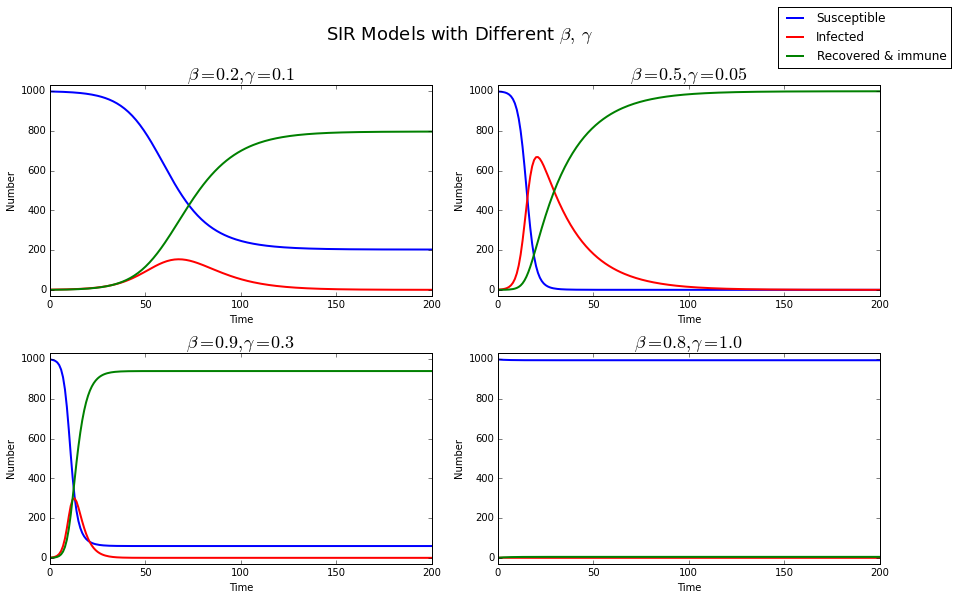

In [189]:

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
fig, axs = plt.subplots(2, 2, figsize=(13,8))#make em bigger boi
ttl=fig.suptitle(r"SIR Models with Different $\beta , \, \gamma$", fontsize=18)
ttl.set_position([.5, 1.03])

fig.tight_layout(pad=4.0)
axs[0,0].plot(t, S1, 'b',  lw=2, label='Susceptible')
axs[0,0].plot(t, I1, 'r',  lw=2, label='Infected')
axs[0,0].plot(t, R1, 'g', lw=2, label='Recovered with immunity')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('Number')
axs[0,0].set_ylim(-30,1030)
axs[0,0].set_title(r'$\beta=0.2, \gamma=0.1$', fontsize=18)

axs[1,0].plot(t, S2, 'b',  lw=2, label='Susceptible')
axs[1,0].plot(t, I2, 'r',  lw=2, label='Infected')
axs[1,0].plot(t, R2, 'g',  lw=2, label='Recovered with immunity')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('Number')
axs[1,0].set_ylim(-30,1030)
axs[1,0].set_title(r'$\beta=0.9, \gamma=0.3$', fontsize=18)

axs[0,1].plot(t, S3, 'b',  lw=2, label='Susceptible')
axs[0,1].plot(t, I3, 'r',  lw=2, label='Infected')
axs[0,1].plot(t, R3, 'g',  lw=2, label='Recovered & immune')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('Number')
axs[0,1].set_ylim(-30,1030)
axs[0,1].set_title(r'$\beta=0.5, \gamma=0.05$', fontsize=18)
axs[0,1].legend(bbox_to_anchor=(1.2, 1.4))

axs[1,1].plot(t, S4, 'b',  lw=2, label='Susceptible')
axs[1,1].plot(t, I4, 'r',  lw=2, label='Infected')
axs[1,1].plot(t, R4, 'g', lw=2, label='Recovered & immune')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('Number')
axs[1,1].set_ylim(-30,1030)
axs[1,1].set_title(r'$\beta=0.8, \gamma=1.0$', fontsize=18)

fig.savefig('Q3_plot.png',bbox_inches='tight', dpi=300)
fig.savefig('Q3_plot.pdf',bbox_inches='tight', dpi=300)


In [ ]:
#Q3 bonus
D0 = 0 #initial dead
w0 = S0, I0, R0, D0
alpha = [0.001, 0.05, 0.1, 0.3]
def odesb(w, t, N, beta, gamma, alpha): #write params thing
    '''Defines three differential equations
    Params: 
    v - dummy variable for S,I,R values
    t - time array
    N - population size, integer
    beta - float
    gamma - float
    Returns: RHS of differential equations'''
    S,I,R,D = w
    dS = -beta*S*I/N
    dI = beta*S*I/N - gamma*I - alpha*I
    dR = gamma*I
    dD = alpha*I
    return dS, dI, dR, dD

# Integrate the SIR equations in time
solvd1b = odeint(odesb, w0, t, args=(N, beta[0], gamma[0], alpha[0]))
S1b, I1b, R1b, D1 = solvd1b.T

solvd2b = odeint(odesb, w0, t, args=(N, beta[1], gamma[1], alpha[1]))
S2b, I2b, R2b, D2 = solvd2b.T

solvd3b = odeint(odesb, w0, t, args=(N, beta[2], gamma[2], alpha[2]))
S3b, I3b, R3b, D3 = solvd3b.T

solvd4b = odeint(odesb, w0, t, args=(N, beta[3], gamma[3], alpha[3]))
S4b, I4b, R4b, D4 = solvd4b.T


In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t), and D(t)
fig = plt.figure()
fig, axs = plt.subplots(2, 2, figsize=(13,8))#make em bigger boi
ttl=fig.suptitle(r"SIRD Models with Different $\beta , \, \gamma , \, \alpha$", fontsize=18)
ttl.set_position([.5, 1.03])

fig.tight_layout(pad=4.0)
axs[0,0].plot(t, S1b, 'b',  lw=2, label='Susceptible')
axs[0,0].plot(t, I1b, 'r',  lw=2, label='Infected')
axs[0,0].plot(t, R1b, 'g', lw=2, label='Recovered with immunity')
axs[0,0].plot(t, D1, 'k',  lw=2, label='Dead')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('Number')
axs[0,0].set_ylim(-30,1030)
axs[0,0].set_title(r'$\beta=0.2, \gamma=0.1, \alpha=0.001$', fontsize=18)

axs[1,0].plot(t, S2b, 'b',  lw=2, label='Susceptible')
axs[1,0].plot(t, I2b, 'r',  lw=2, label='Infected')
axs[1,0].plot(t, R2b, 'g',  lw=2, label='Recovered with immunity')
axs[1,0].plot(t, D2, 'k',  lw=2, label='Dead')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('Number')
axs[1,0].set_ylim(-30,1030)
axs[1,0].set_title(r'$\beta=0.9, \gamma=0.3, \alpha=0.05$', fontsize=18)

axs[0,1].plot(t, S3b, 'b',  lw=2, label='Susceptible')
axs[0,1].plot(t, I3b, 'r',  lw=2, label='Infected')
axs[0,1].plot(t, R3b, 'g',  lw=2, label='Recovered & immune')
axs[0,1].plot(t, D3, 'k',  lw=2, label='Dead')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('Number')
axs[0,1].set_ylim(-30,1030)
axs[0,1].set_title(r'$\beta=0.5, \gamma=0.05, \alpha=0.1$', fontsize=18)
axs[0,1].legend(bbox_to_anchor=(1.3, 1.5))

axs[1,1].plot(t, S4b, 'b', lw=2, label='Susceptible')
axs[1,1].plot(t, I4b, 'r',  lw=2, label='Infected')
axs[1,1].plot(t, R4b, 'g',  lw=2, label='Recovered & immune')
axs[1,1].plot(t, D4, 'k',  lw=2, label='Dead')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('Number')
axs[1,1].set_ylim(-30,1030)
axs[1,1].set_title(r'$\beta=0.8, \gamma=1.0, \alpha=0.3$', fontsize=18)

fig.savefig('Q3b_plot.png',bbox_inches='tight', dpi=300)
fig.savefig('Q3b_plot.pdf',bbox_inches='tight', dpi=300)
